In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Milestone 1

### Use the PRS dataset to create a dataframe

In [2]:
df=pd.read_csv("Final.csv")

### Check the description of the dataframe

In [3]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


### Check the shape of the dataframe

In [4]:
df.shape

(1101925, 16)

### Check the data frame informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

### Check for the Null values in the dataframe


In [6]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

### Replace all the null values with "NaN"


In [7]:
df.fillna("NaN",inplace=True)

### Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"


In [8]:
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


### Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"


In [9]:
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400


### Sanity check - Check how many records are having order date greater than the delivery date

In [10]:
(df["ORDER_CREATION_DATE"]>df["REQUESTED_DELIVERY_DATE"]).sum()

27142

### Remove those records where order date is greater than the delivery date

In [11]:
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index,inplace=True)
df.shape

(1074783, 16)

### Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [12]:
df["ORDER_AMOUNT"].str.contains("-").sum()

32

### Replace “-” with “” from the “ORDER_AMOUNT” field.

In [13]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")

### Check the number of records where the “ORDER_AMOUNT” field is having “,” in it.

In [14]:
df["ORDER_AMOUNT"].str.contains(",").sum()

1073406

### Replace “,” with “.” from the “ORDER_AMOUNT” field.

In [15]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace(",", ".")

### Count the number of records where the order date and the delivery date are same

In [16]:
(df["ORDER_CREATION_DATE"]==df["REQUESTED_DELIVERY_DATE"]).sum()

100437

### Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [17]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

### Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [18]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}
df['amount_in_usd'] = df.apply(lambda row: float(row['ORDER_AMOUNT'])*conversion_rates.get(row['ORDER_CURRENCY']), axis=1)
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000


### Check for values “0” in the “'amount_in_usd” column. 


In [19]:
(df["amount_in_usd"]==0).sum()

237821

### Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'


In [20]:
# Group the DataFrame based on 'CUSTOMER_NUMBER' and 'COMPANY_CODE', and assign a unique identifier to each group
df['unique_cust_id'] = df.groupby(['CUSTOMER_NUMBER', 'COMPANY_CODE']).ngroup()

# Display the first 5 rows of the DataFrame
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,1116
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,1116
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,87
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,5264
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,4124


# Milestone 2

### Create a Histogram on DISTRIBUTION_CHANNEL

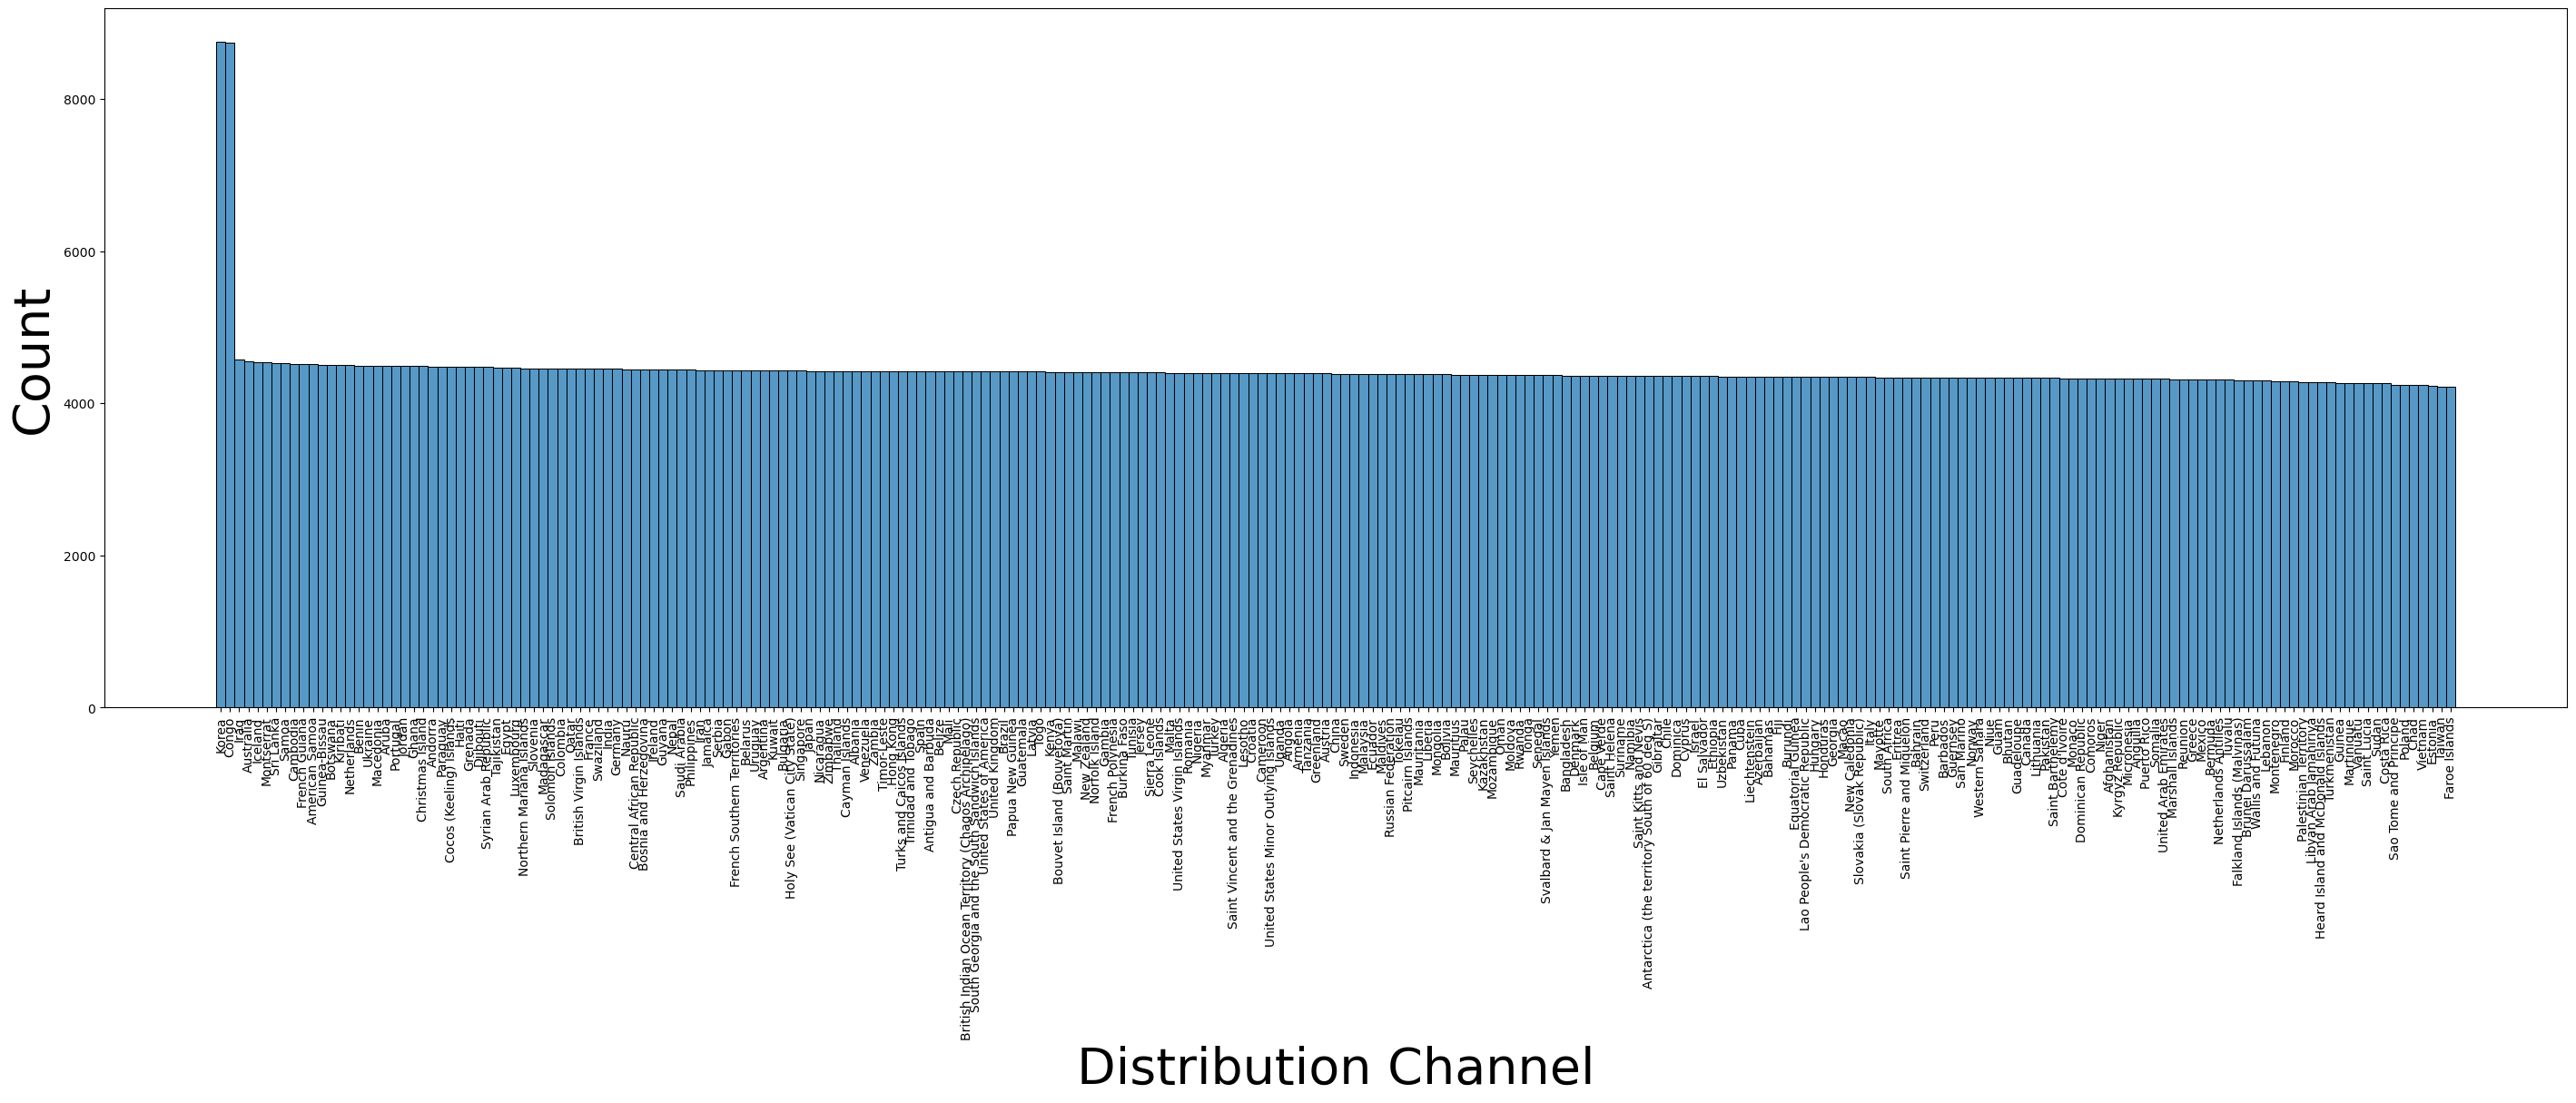

In [21]:
# Set the figure size
plt.figure(figsize=(35,10))

# Create a categorical variable for the distribution channel
dist = pd.Categorical(df['DISTRIBUTION_CHANNEL'], categories=df['DISTRIBUTION_CHANNEL'].value_counts().index, ordered=True)

# Plot the histogram
sns.histplot(dist)

# Set the x-axis label and font size
plt.xlabel('Distribution Channel', fontsize=40)

# Set the y-axis label and font size
plt.ylabel('Count', fontsize=40)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


### Create a Pie Chart on ORDER_CURRENCY

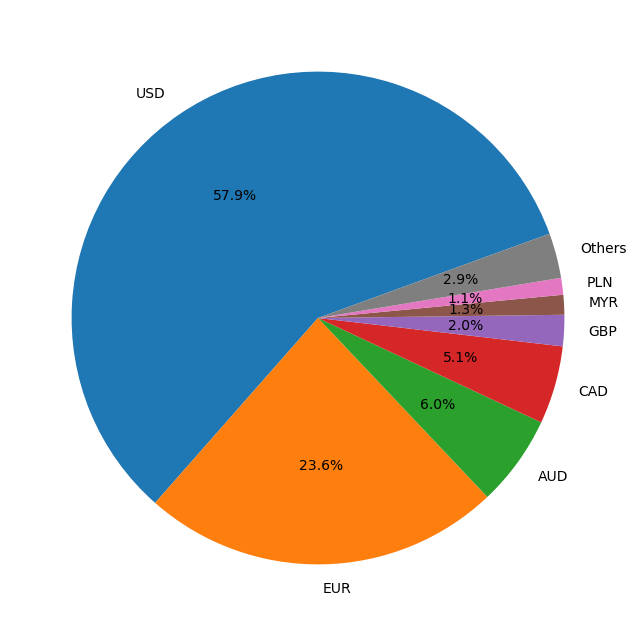

In [22]:
# Calculate value counts for the 'ORDER_CURRENCY' column
value_counts = df['ORDER_CURRENCY'].value_counts()

# Calculate the total count of values
total_count = value_counts.sum()

# Calculate the threshold for considering a value as significant (1% of the total count)
threshold = 0.01 * total_count

# Get the significant labels and counts that meet the threshold
significant_labels = value_counts[value_counts >= threshold].index.tolist()
significant_counts = value_counts[value_counts >= threshold].values.tolist()

# Calculate the count for the 'Others' category
others_count = value_counts[value_counts < threshold].sum()

# Create labels and counts for the pie chart, including the 'Others' category
labels = significant_labels + ['Others']
counts = significant_counts + [others_count]

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart with percentages
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=20)

# Display the plot
plt.show()

### Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

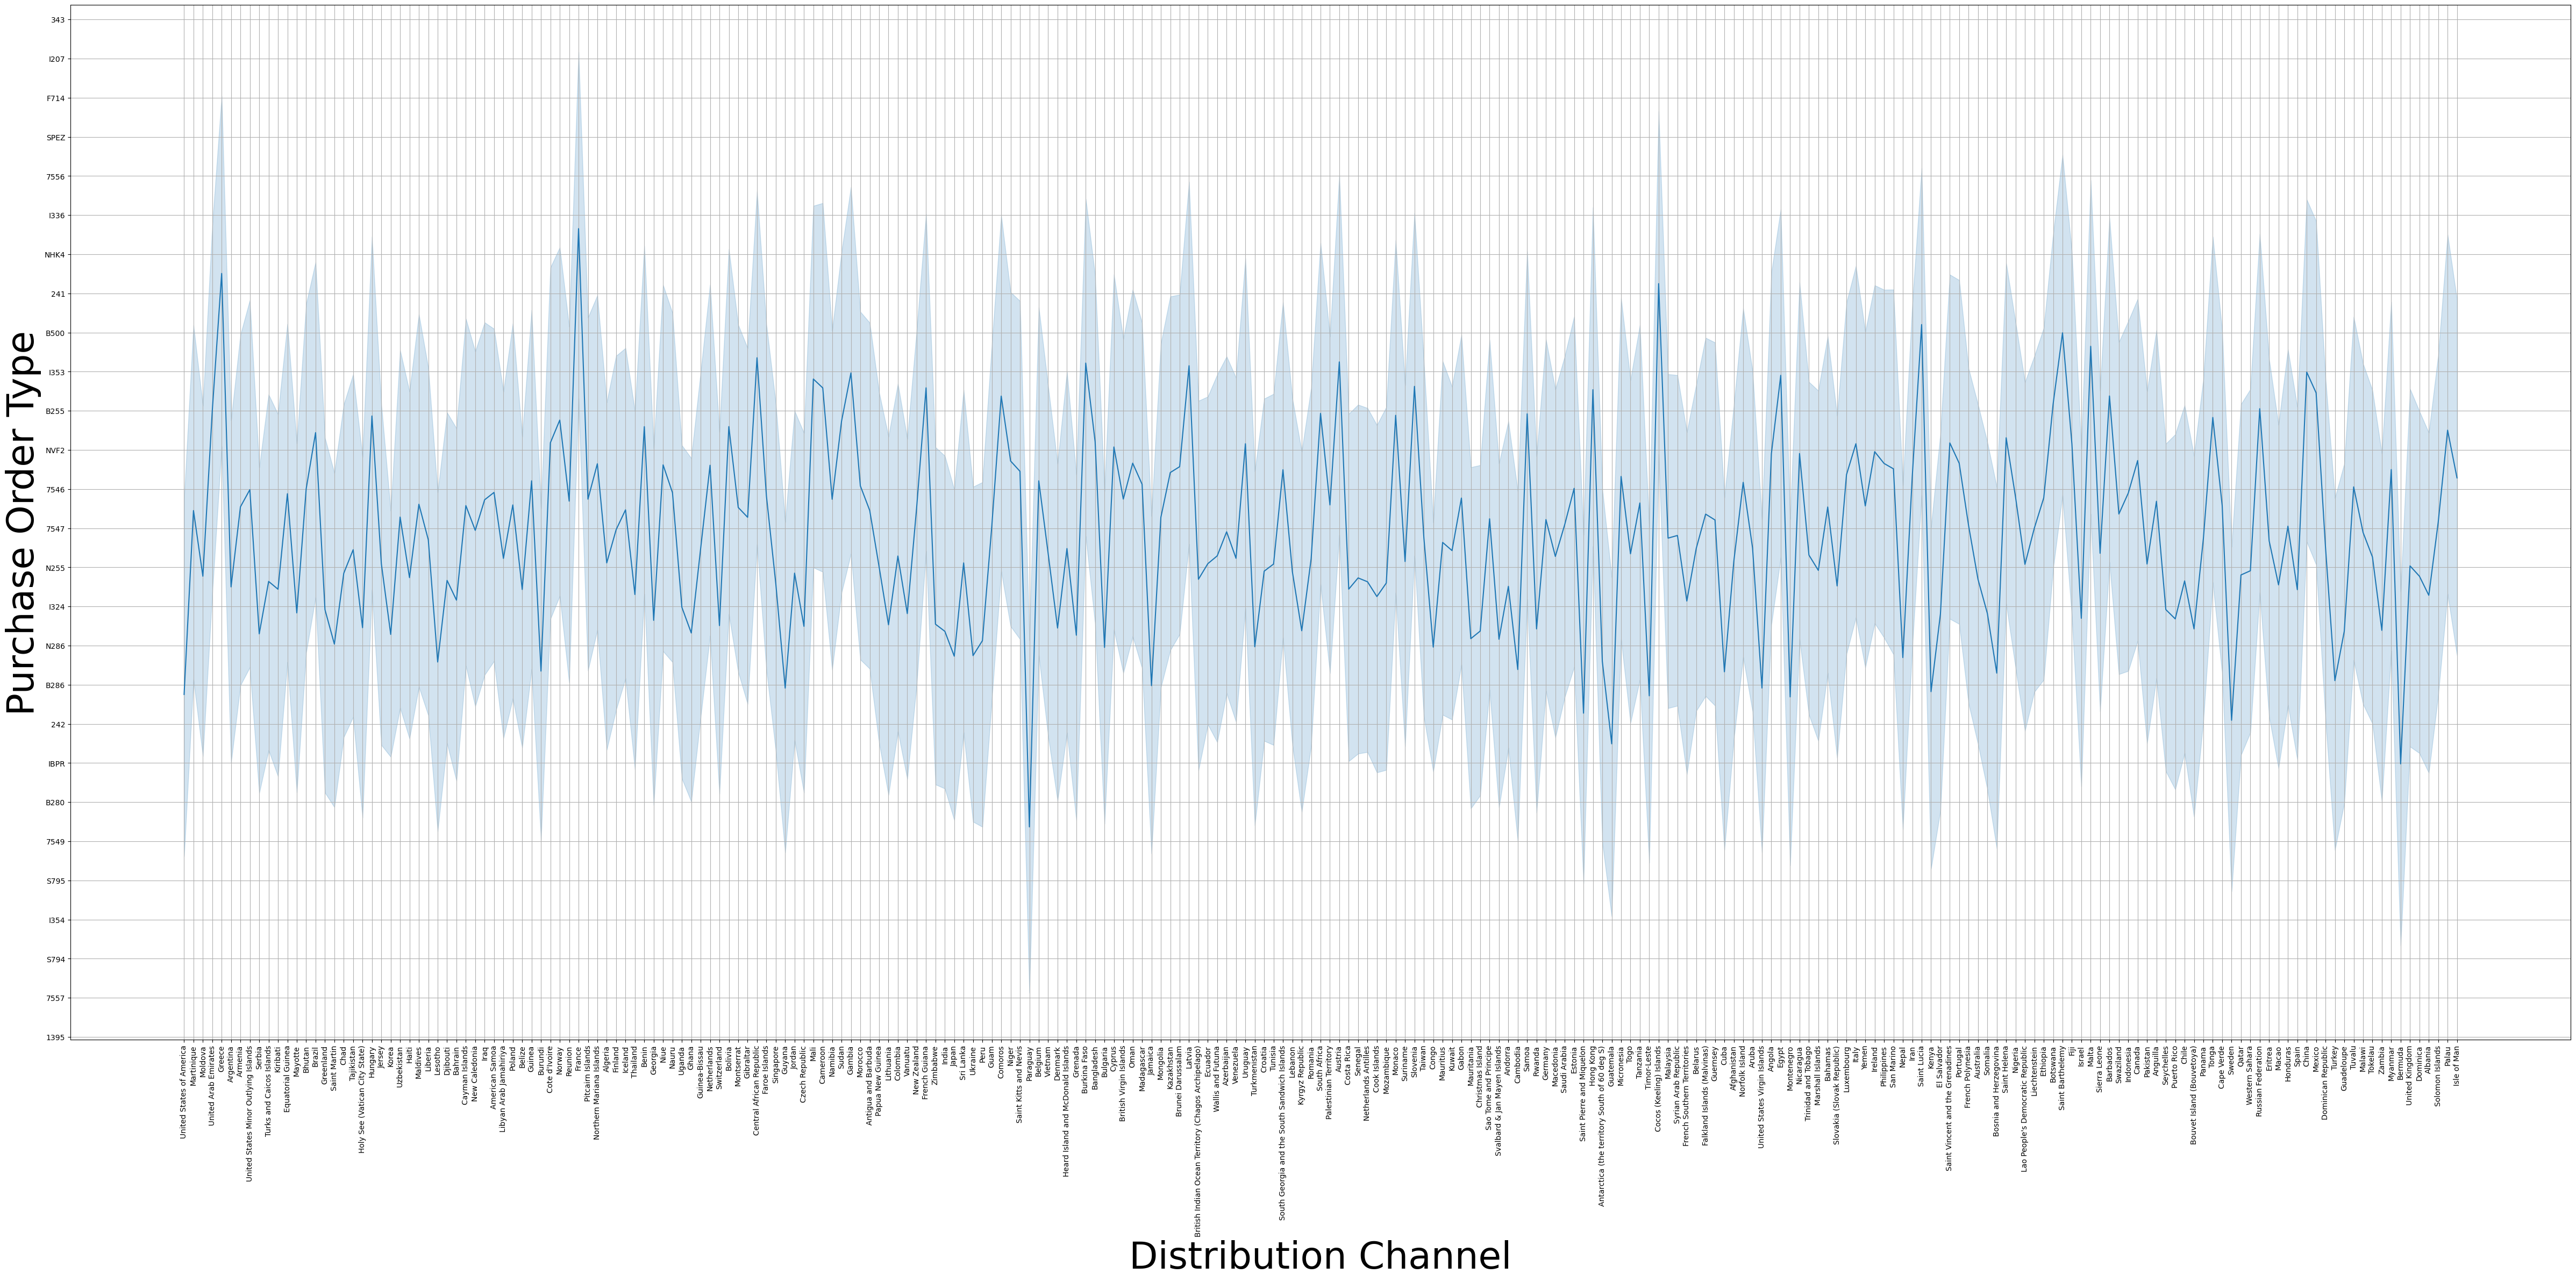

In [23]:
# Set the figure size
plt.figure(figsize=(60, 25))

# Plot the line plot using seaborn
sns.lineplot(x=df['DISTRIBUTION_CHANNEL'], y=df['PURCHASE_ORDER_TYPE'], data=df)

# Set the x-axis label and its fontsize
plt.xlabel('Distribution Channel', fontsize=50)

# Set the y-axis label and its fontsize
plt.ylabel('Purchase Order Type', fontsize=50)

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Add gridlines to the plot
plt.grid(True)

# Display the plot
plt.show()

### Create a line plot on ORDER_CREATION_DATE and amount_in_usd


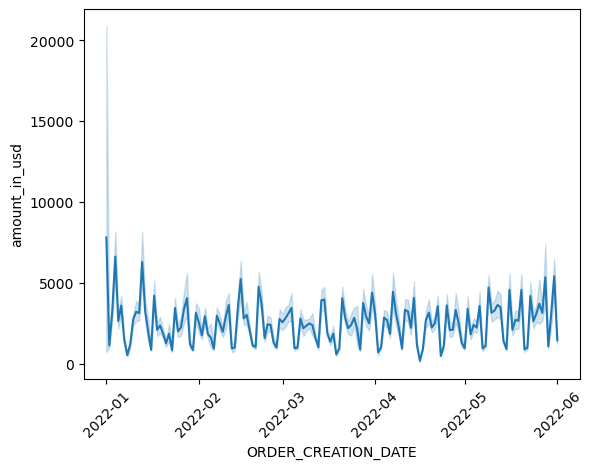

In [24]:
# Plot the line plot using seaborn
sns.lineplot(data=df, x='ORDER_CREATION_DATE', y='amount_in_usd')

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Create a boxplot on ORDER_AMOUNT	to find out the outliers

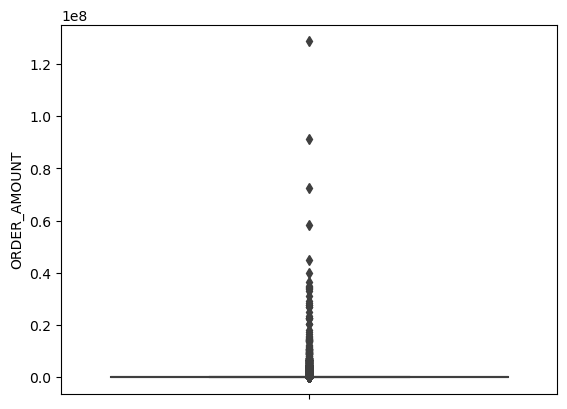

In [25]:
# Convert the 'ORDER_AMOUNT' column to numeric type, handling errors as 'coerce'
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

# Create a boxplot using seaborn, with 'ORDER_AMOUNT' as the y-axis variable
sns.boxplot(data=df, y='ORDER_AMOUNT')

# Display the plot
plt.show()

In [26]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the 'ORDER_AMOUNT' column
Q1 = df['ORDER_AMOUNT'].quantile(0.25)
Q3 = df['ORDER_AMOUNT'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers by filtering the DataFrame based on the bounds
outliers = df[(df['ORDER_AMOUNT'] < lower_bound) | (df['ORDER_AMOUNT'] > upper_bound)]

# Display the outliers
outliers


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,87
8,821659852,2470,United States of America,South-Region,"0,00",2590,3220,2022-01-02,130024,NR02,814096053,8380.69,2022-01-06,EUR,NaN,1230021722,9051.1452,6386
34,811385935,4071,New Caledonia,South-Region,"2810,32",N241,3290,2022-01-02,133029,NR02,842182466,2322.58,2022-01-07,EUR,64.0,1210182468,2508.3864,3728
59,761953719,3252,Georgia,South-Region,"0,00",DFUE,3350,2022-01-01,60015,SR04,933063612,471493.37,2022-01-03,EUR,NaN,1210324854,509212.8396,3861
68,785805294,2182,Djibouti,North-Region,"0,00",DFUE,3350,2022-01-01,60021,NR02,766021996,7119.06,2022-01-03,EUR,NaN,1230018428,7688.5848,6257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101916,856103636,2832,Guinea-Bissau,North-Region,"0,00",9999,3000,2022-06-01,220008,NR02,777305297,95146.80,2022-06-07,AUD,64.0,1230011799,62796.8880,5930
1101917,783964407,4054,Swaziland,North-Region,"0,00",9999,3000,2022-06-01,220040,NR03,839792137,66728.04,2022-06-08,AUD,64.0,1230011799,44040.5064,5930
1101918,816646672,3734,Argentina,North-Region,"0,00",9999,3000,2022-06-01,220103,NR03,766136615,8151.84,2022-06-08,AUD,64.0,1230011799,5380.2144,5930
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,3987


### Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

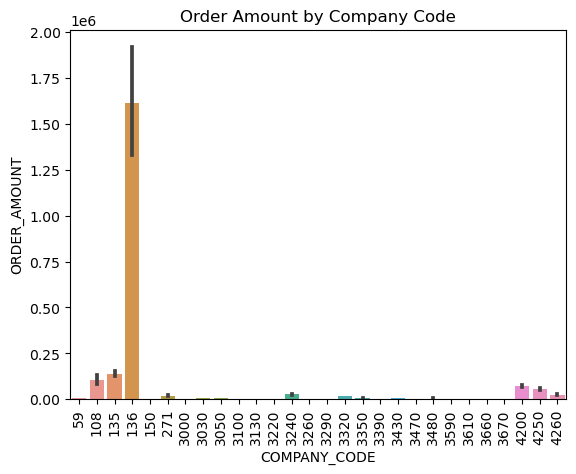

In [27]:
# Create a bar plot using seaborn
sns.barplot(x='COMPANY_CODE', y='ORDER_AMOUNT', data=df)

# Set the title of the plot
plt.title('Order Amount by Company Code')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


# Milestone 3

### Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

In [28]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = df[(df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound)]

# Calculate the replacement value as the median of 'amount_in_usd'
replacement_value = np.median(df['amount_in_usd'])

# Replace the outliers with the replacement value in 'amount_in_usd' column
df['amount_in_usd'] = np.where((df['amount_in_usd'] < lower_bound) | (df['amount_in_usd'] > upper_bound), replacement_value, df['amount_in_usd'])

# Display the first 5 rows of the modified DataFrame
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,1116
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,1116
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,261.0000,87
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,5264
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,4124


### Label encoding or One hot Encoding on all the categorical columns 


In [29]:
# List of categorical columns to be label encoded
categorical_cols = ['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE',
                    'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CREDIT_STATUS']

# Initialize LabelEncoder
le = LabelEncoder()

# Perform label encoding for each categorical column
for cat in categorical_cols:
    df[cat] = le.fit_transform(df[cat].astype(str))

# Display the first 5 rows of the modified DataFrame
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,954.61,2022-01-13,6,3,12311807,1030.9788,1116
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,787.36,2022-01-11,6,3,12311807,850.3488,1116
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,67493.46,2022-01-12,6,2,12118758,261.0000,87
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,1405.54,2022-01-06,6,2,1210499770,1517.9832,5264
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.00,2022-01-06,6,1,1210351400,0.0000,4124


### Log Transformations on continuous columns 


In [30]:
# List of continuous columns to be log-transformed
continuous_cols = ['ORDER_AMOUNT', 'amount_in_usd']

# Apply log transformation using np.log1p() function
df[continuous_cols] = np.log1p(df[continuous_cols])

# Display the first 5 rows of the modified DataFrame
df[:5]

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,6.862350,2022-01-13,6,3,12311807,6.939233,1116
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,6.669955,2022-01-11,6,3,12311807,6.746822,1116
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,11.119801,2022-01-12,6,2,12118758,5.568345,87
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,7.248888,2022-01-06,6,2,1210499770,7.325796,5264
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.000000,2022-01-06,6,1,1210351400,0.000000,4124


### Try to extract new features by grouping existing columns

In [31]:
# Calculate the mean order amount by sales organization
df_grouped_sales_org = df.groupby('SALES_ORG')['ORDER_AMOUNT'].mean()

# Calculate the sum of order amount by division
df_grouped_division = df.groupby('DIVISION')['ORDER_AMOUNT'].sum()

# Calculate the record count by credit status
df_grouped_credit_status = df.groupby('CREDIT_STATUS').size()

# Create a new DataFrame to store the extracted features
df_features = pd.DataFrame()

# Map the mean order amount by sales organization to the 'SALES_ORG' column in the new DataFrame
df_features['mean_order_amount_by_sales_org'] = df['SALES_ORG'].map(df_grouped_sales_org)

# Map the sum of order amount by division to the 'DIVISION' column in the new DataFrame
df_features['sum_order_amount_by_division'] = df['DIVISION'].map(df_grouped_division)

# Map the record count by credit status to the 'CREDIT_STATUS' column in the new DataFrame
df_features['record_count_by_credit_status'] = df['CREDIT_STATUS'].map(df_grouped_credit_status)

# Display the new DataFrame with the extracted features
df_features

,mean_order_amount_by_sales_org,sum_order_amount_by_division,record_count_by_credit_status
0,4.736865,1.925744e+06,863456
1,5.001195,1.925744e+06,863456
2,4.906579,1.925744e+06,78680
3,4.626937,1.925744e+06,78680
4,4.611887,1.925744e+06,126598
...,...,...,...
1101920,4.728644,1.925744e+06,863456
1101921,4.757516,1.925744e+06,863456
1101922,4.788595,1.925744e+06,863456
1101923,4.754305,1.925744e+06,863456


### Create a heatmap to find correlation between the columns


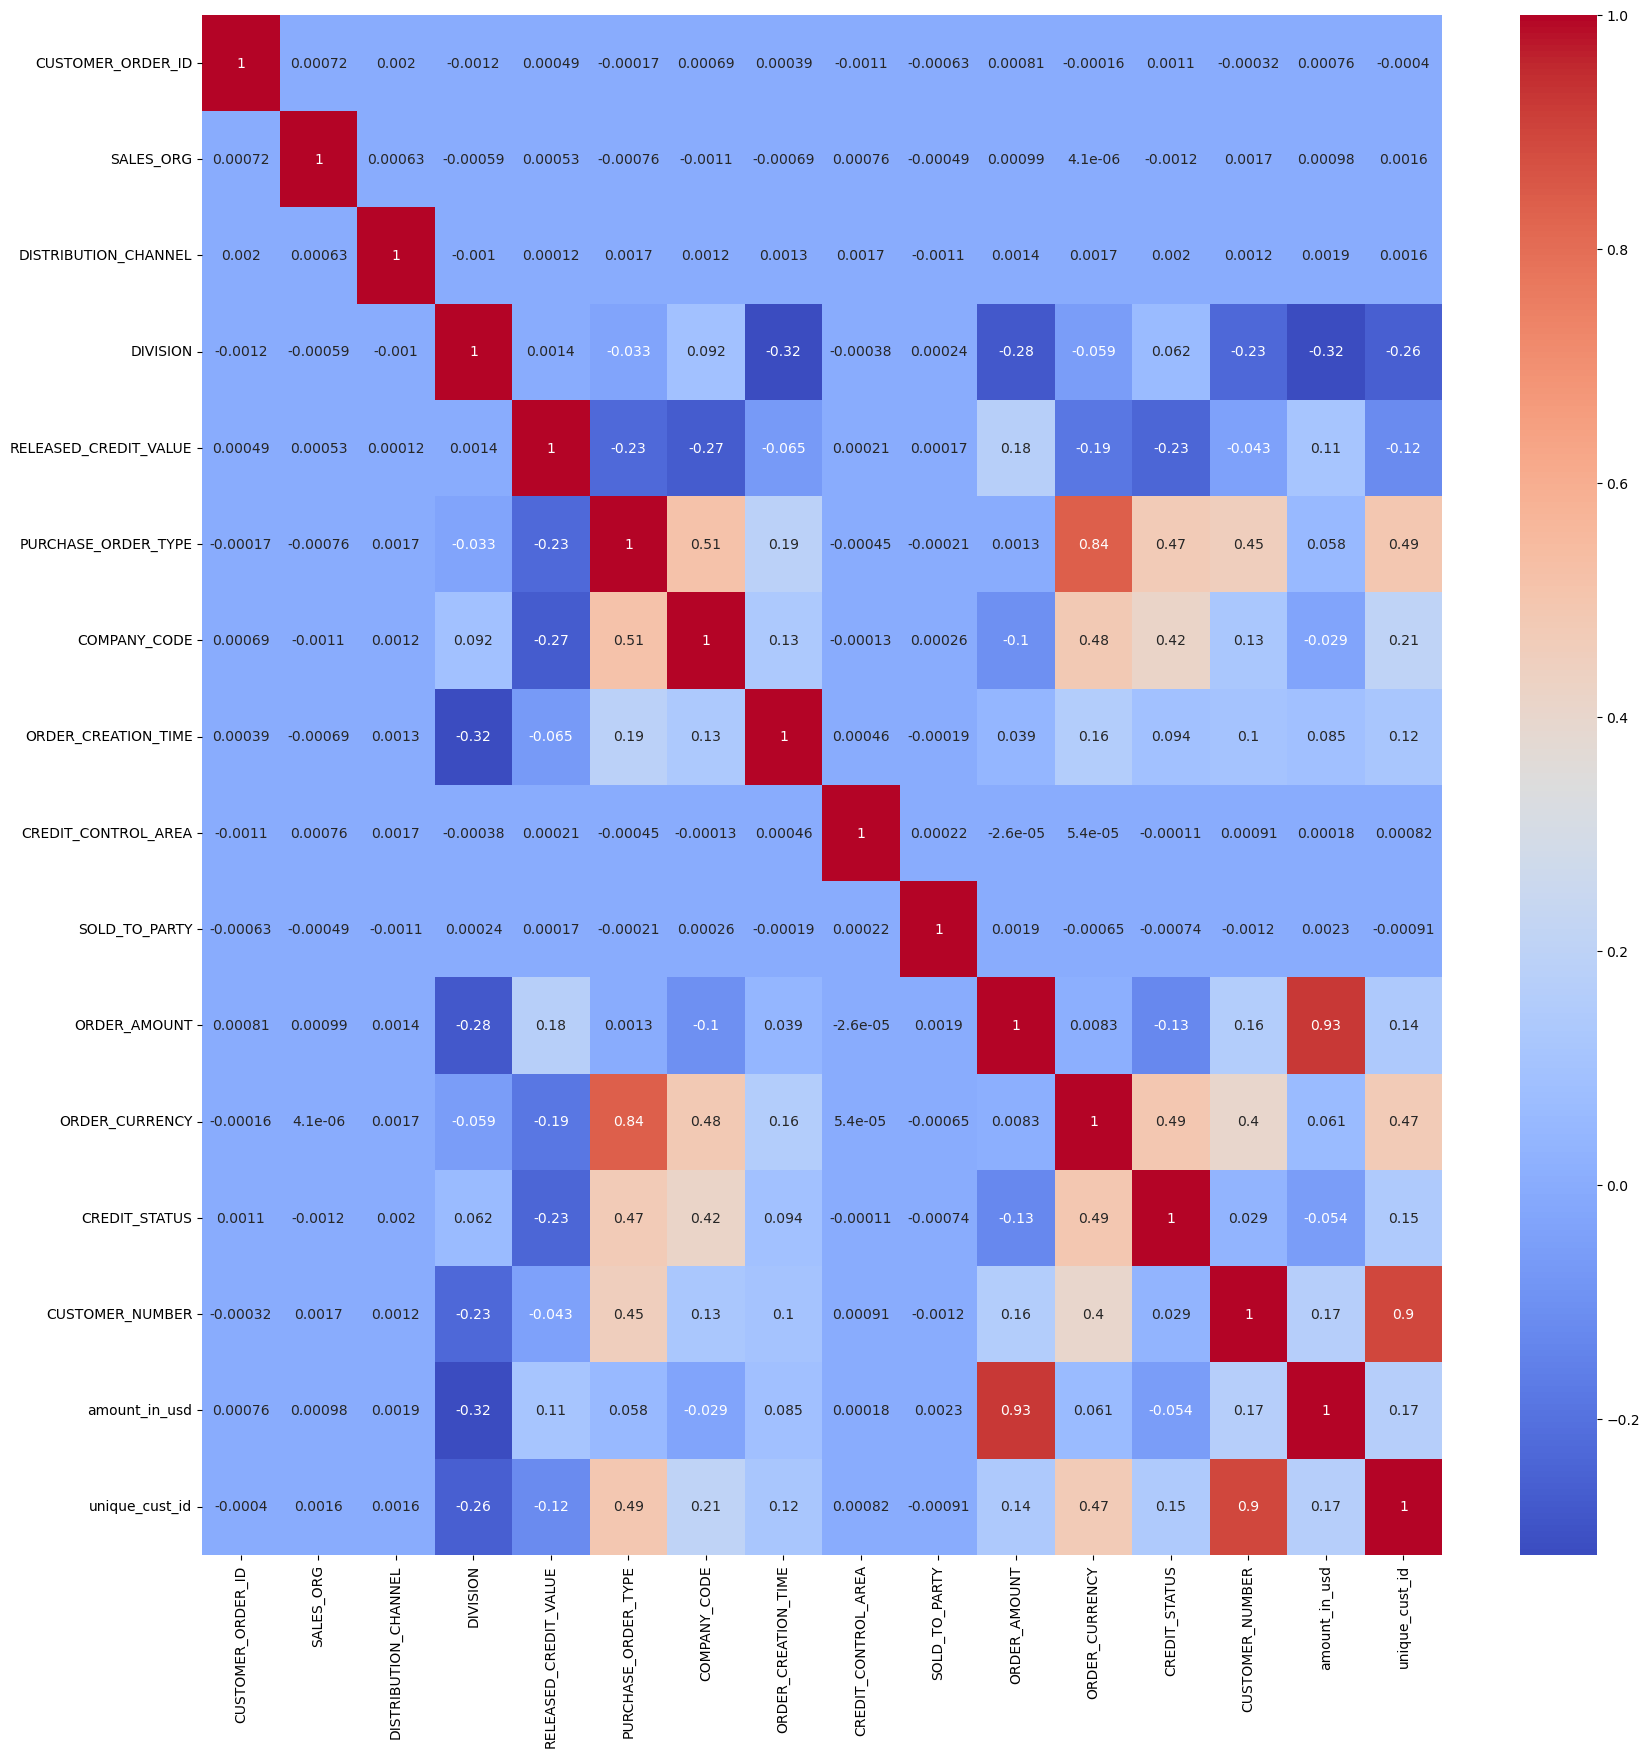

In [32]:
# Set the figure size for the heatmap
plt.figure(figsize=(20, 20))

# Generate the correlation matrix using the corr() function on the DataFrame 'df'
correlation_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()

### Try to identify important or relevant columns for feature extraction

In [33]:
# Calculate the absolute correlation matrix
corr_matrix = df.corr().abs()

# Find the indices of variables with correlation greater than 0.7
high_corr_var = np.where(corr_matrix > 0.7)

# Create a list of variable pairs with high correlation
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Print the list of variable pairs with high correlation
high_corr_var

[('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'),
 ('ORDER_AMOUNT', 'amount_in_usd'),
 ('CUSTOMER_NUMBER', 'unique_cust_id')]

# Milestone 4

###  Modify the dataset to pass into any type of machine learning models. 

In [34]:
# Standardize the continuous columns
s = StandardScaler()
df[continuous_cols] = s.fit_transform(df[continuous_cols])  

# Select specific columns of interest
dfn = df[['RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', "ORDER_CREATION_TIME", 'ORDER_CURRENCY', "CREDIT_STATUS", 'unique_cust_id', 'amount_in_usd']]  


def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)  # Create lagged columns for net amount based on customer ID
    
    melt = melt.reset_index(drop=True)  # Reset the index
    
    for i in range(ffday, lags+1):
        melt['Last-' + str(i) + 'day_Diff'] = melt.groupby([customer_id_col])['Last-' + str(i) + 'day_Sales'].diff()  # Calculate the difference in net amount between consecutive days
    
    melt = melt.fillna(0)  # Replace missing values with 0
    return melt

difference_in_days(dfn, 7, 1, 'unique_cust_id', 'ORDER_CREATION_DATE', 'amount_in_usd')  # Apply the difference_in_days function to create lagged and difference columns

dfn1=dfn.copy()
y = dfn['amount_in_usd']  # Set the target variable
dfn.drop("amount_in_usd", axis=1, inplace=True)  # Remove the target variable from the features
dfn.replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinite values with 0
dfn.fillna(0, inplace=True)  # Replace missing values with 0
X = dfn  # Set the features

dfn1['amount_in_usd'] = np.exp(dfn1['amount_in_usd'])
dfn1.to_csv("FinalNew.csv")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)


C:\Users\mriga\AppData\Local\Temp\ipykernel_18144\4253297105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melt['Last-' + str(i) + 'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)  # Create lagged columns for net amount based on customer ID
C:\Users\mriga\AppData\Local\Temp\ipykernel_18144\4253297105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melt['Last-' + str(i) + 'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)  # Create lagged columns for ne

### Try different machine learning models like - 
### Linear Regression
### Support Vector Machine 
### Decision Tree
### Random Forest 
### AdaBoost
### Xgboost etc. 


In [35]:
lr_model = LinearRegression()  # Create a Linear Regression model
lr_model.fit(X_train, y_train)  # Train the Linear Regression model
lr_pred = lr_model.predict(X_test)  # Make predictions using the Linear Regression model

dt_model = DecisionTreeRegressor()  # Create a Decision Tree Regression model
dt_model.fit(X_train, y_train)  # Train the Decision Tree Regression model
dt_pred = dt_model.predict(X_test)  # Make predictions using the Decision Tree Regression model

rf_model = RandomForestRegressor()  # Create a Random Forest Regression model
rf_model.fit(X_train, y_train)  # Train the Random Forest Regression model
rf_pred = rf_model.predict(X_test)  # Make predictions using the Random Forest Regression model

ada_model = AdaBoostRegressor()  # Create an AdaBoost Regression model
ada_model.fit(X_train, y_train)  # Train the AdaBoost Regression model
ada_pred = ada_model.predict(X_test)  # Make predictions using the AdaBoost Regression model

xgb_model = XGBRegressor()  # Create an XGBoost Regression model
xgb_model.fit(X_train, y_train)  # Train the XGBoost Regression model
xgb_pred = xgb_model.predict(X_test)  # Make predictions using the XGBoost Regression model


### Perform Regression model evaluations like MSE, RMSE, R-Square etc.


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_pred)  # Calculate Mean Squared Error for Linear Regression
lr_rmse = np.sqrt(lr_mse)  # Calculate Root Mean Squared Error for Linear Regression
lr_r2 = r2_score(y_test, lr_pred)  # Calculate R-squared for Linear Regression

# Calculate metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_pred)  # Calculate Mean Squared Error for Decision Tree Regression
dt_rmse = np.sqrt(dt_mse)  # Calculate Root Mean Squared Error for Decision Tree Regression
dt_r2 = r2_score(y_test, dt_pred)  # Calculate R-squared for Decision Tree Regression

# Calculate metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_pred)  # Calculate Mean Squared Error for Random Forest Regression
rf_rmse = np.sqrt(rf_mse)  # Calculate Root Mean Squared Error for Random Forest Regression
rf_r2 = r2_score(y_test, rf_pred)  # Calculate R-squared for Random Forest Regression

# Calculate metrics for AdaBoost Regression
ada_mse = mean_squared_error(y_test, ada_pred)  # Calculate Mean Squared Error for AdaBoost Regression
ada_rmse = np.sqrt(ada_mse)  # Calculate Root Mean Squared Error for AdaBoost Regression
ada_r2 = r2_score(y_test, ada_pred)  # Calculate R-squared for AdaBoost Regression

# Calculate metrics for XGBoost Regression
xgb_mse = mean_squared_error(y_test, xgb_pred)  # Calculate Mean Squared Error for XGBoost Regression
xgb_rmse = np.sqrt(xgb_mse)  # Calculate Root Mean Squared Error for XGBoost Regression
xgb_r2 = r2_score(y_test, xgb_pred)  # Calculate R-squared for XGBoost Regression


### Compare the accuracies of all the models 

In [37]:
model = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
mse_values = [lr_mse, dt_mse, rf_mse, ada_mse, xgb_mse]  
rmse_values = [lr_rmse, dt_rmse, rf_rmse, ada_rmse, xgb_rmse]  
r2_values = [lr_r2, dt_r2, rf_r2, ada_r2, xgb_r2]  

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': model,
                           'MSE': mse_values,
                           'RMSE': rmse_values,
                           'R-squared': r2_values})
metrics_df

,Model,MSE,RMSE,R-squared
0,Linear Regression,0.266105,0.515853,0.733308
1,Decision Tree,0.420732,0.648638,0.578340
2,Random Forest,0.216000,0.464758,0.783524
3,AdaBoost,0.341891,0.584715,0.657354
4,XGBoost,0.203877,0.451528,0.795673


### Select the best possible model


In [38]:
sorted_metrics_df = metrics_df.sort_values(by=['MSE'])  # Change the metric as needed

# Get the best model based on the sorted DataFrame
best_model = sorted_metrics_df['Model'].iloc[0]

# Print the sorted metrics DataFrame and the best model
print("Metrics for different models:")
print(sorted_metrics_df)
print("\nBest model: ", best_model)

Metrics for different models:
               Model       MSE      RMSE  R-squared
4            XGBoost  0.203877  0.451528   0.795673
2      Random Forest  0.216000  0.464758   0.783524
0  Linear Regression  0.266105  0.515853   0.733308
3           AdaBoost  0.341891  0.584715   0.657354
1      Decision Tree  0.420732  0.648638   0.578340

Best model:  XGBoost


### Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = XGBRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term on weights
}

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2')
random_search.fit(X_train, y_train)

# Get the best hyperparameters, score and model
print("Best Hyperparameters:", random_search.best_params_)  # Best hyperparameters found during the search
print("Best Score:", random_search.best_score_)  # Best score achieved by the model
print("Best Model:", random_search.best_estimator_)  # Best model with the best hyperparameters


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Score: 0.7986965422835149
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


### Come up with the best possible model accuracy.


In [41]:
# model evaluations like MSE, RMSE, R-Square after Hyperparameter tuning
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  0.20078531405956446
RMSE:  0.44809074310854097
R2:  0.7987717634876752
